In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/80-cereals/cereal.csv


# Objetivo: Estimar a quantidade de calorias de um cereal com base em seu nível de açúcar

**Gráfico de dispersão dos dados para classificações vs nível de açúcar**

In [2]:
df = pd.read_csv('/kaggle/input/80-cereals/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Cleaning Data

In [3]:
df[df['sugars'] < 0] = 0

(0.0, 100.0)

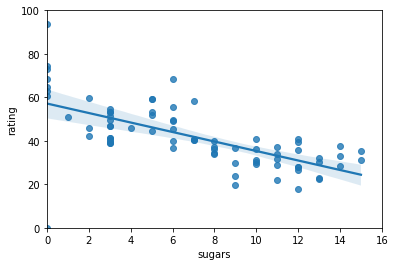

In [4]:
sns.regplot(data=df, x="sugars", y="rating")
plt.xlim(0,16)
plt.ylim(0,100)

In [5]:
df.shape

(77, 16)

In [6]:
df.shape[0]*0.3

23.099999999999998

In [7]:
# Vamos usar aproximidamente 30% dos dados como dados de teste
number = int(df.shape[0]*0.3) 

In [8]:
# Separando o que é dados que serão inputados na nossa
# regressão e o que será usado para testa-ela
# lembrando, x equivale aos dados que usamos
# para prever y
X_train = df['sugars'][0:number].values.reshape((df['sugars'][0:number].shape[0],1))
X_test = df['sugars'][number::].values.reshape((df['sugars'][number::].shape[0],1))


In [9]:
# Separando o que é dados que serão inputados na nossa
# regressão e o que será usado para testa-ela
# lembrando, y equivale aos dados que queremos prever
y_train = df.calories[0:number].values.reshape((df['sugars'][0:number].shape[0],1))
y_test = df.calories[number::].values.reshape((df['sugars'][number::].shape[0],1))

In [10]:
# montando nosso modelo de regressão linear
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [11]:
# prevendo o dados de teste
y_pred = regr.predict(X_test)

In [12]:
# Verificando o quão relacionados estão X e Y
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[2.00766703]]


In [13]:
# verificando o erro médio
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Mean squared error: 429.10


In [14]:
# se der 1, nosso modelo está maravilhosamente bom
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.28


([], [])

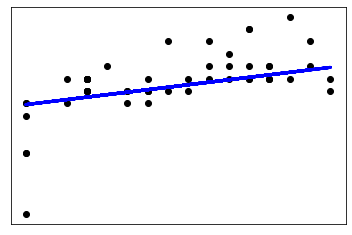

In [15]:

# plotando um gráfico
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())